In [1]:
import numpy as np
import pandas as pd

import sys
sys.path.insert(0, '..')

from match.make_match_panel import make_match_panel
from match.make_summary_match_panel import make_summary_match_panel
from match.support.support.df import simulate_df
from match.support.support.s import simulate_s

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
n = 10

In [3]:
target = simulate_s(n, index_prefix='Sample ')

target

Sample 0    0.610558
Sample 1    0.693242
Sample 2    0.370743
Sample 3    0.239541
Sample 4    0.022965
Sample 5    0.377475
Sample 6    0.436000
Sample 7    0.423538
Sample 8    0.219712
Sample 9    0.360758
Name: Simulated Series, dtype: float64

In [4]:
features_continuous = simulate_df(
    n * 1, n, index_prefix='Feature ', column_prefix='Sample ')

features_continuous

,Sample 0,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8,Sample 9
Feature 0,0.852131,0.415845,0.462960,0.884815,0.014518,0.873408,0.261048,0.781059,0.402667,0.613653
Feature 1,0.518798,0.990516,0.666556,0.113198,0.186503,0.138477,0.803428,0.415389,0.473928,0.404193
Feature 2,0.890012,0.958418,0.629885,0.077293,0.297351,0.568162,0.741016,0.129562,0.105937,0.458378
Feature 3,0.274829,0.099234,0.137939,0.462089,0.354276,0.374905,0.134969,0.444279,0.494037,0.185391
Feature 4,0.903414,0.905481,0.642547,0.675748,0.490953,0.372855,0.872631,0.573930,0.576209,0.335867
Feature 5,0.155875,0.964514,0.398613,0.771192,0.987695,0.370732,0.194824,0.255656,0.893199,0.533064
Feature 6,0.618202,0.643675,0.228289,0.532212,0.596899,0.218942,0.958013,0.031391,0.806522,0.577179
Feature 7,0.303863,0.291879,0.171765,0.165319,0.423193,0.942285,0.969259,0.704271,0.408621,0.236947
Feature 8,0.264014,0.933242,0.800661,0.923796,0.547583,0.984417,0.552668,0.936480,0.786496,0.795547
Feature 9,0.776574,0.941046,0.573815,0.186070,0.943517,0.162732,0.424671,0.961685,0.032658,0.012187


Sorting target and features.columns (based on target.index) ...
Matching ...
Matching using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	with 3 bootstrapped distributions ...
Computing p-value and FDR ...
	by scoring against 3 permuted targets ...
Sorting score ...
Making annotations ...
Plotting match panel ...


/Users/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


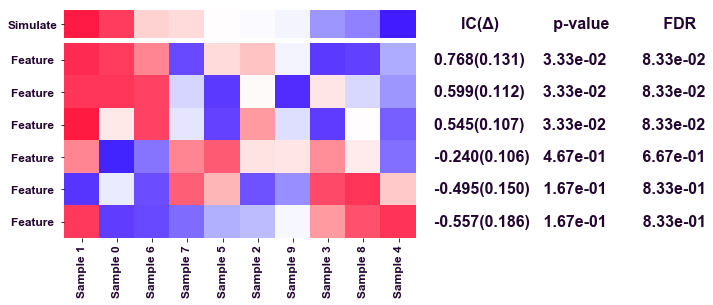

In [5]:
match_scores_for_continuous = make_match_panel(
    target,
    features_continuous,
    n_features=3,
    n_samplings=3,
    n_permutations=3,
    plot_sample_names=True)

In [6]:
target_str = pd.Series(
    ['T0'] * (n // 2) + ['T1'] * (n // 2), index=target.index)

target_str

Sample 0    T0
Sample 1    T0
Sample 2    T0
Sample 3    T0
Sample 4    T0
Sample 5    T1
Sample 6    T1
Sample 7    T1
Sample 8    T1
Sample 9    T1
dtype: object

Sorting target and features.columns (based on target.index) ...
Making target numerical ...
Clustering within categories ...
Matching ...
Matching using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	with 3 bootstrapped distributions ...
Computing p-value and FDR ...
	by scoring against 3 permuted targets ...
Sorting score ...
Making annotations ...
Plotting match panel ...


/Users/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


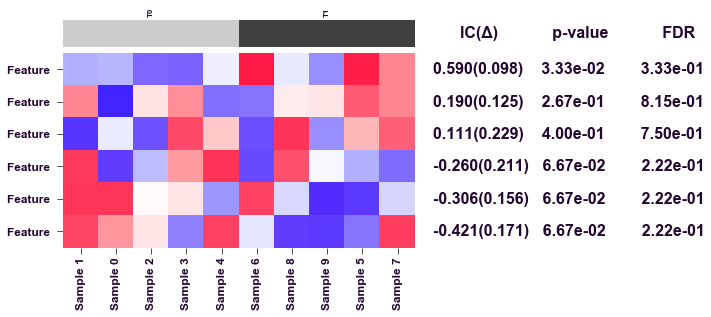

In [7]:
from matplotlib.colors import ListedColormap

match_scores_for_continuous = make_match_panel(
    target_str,
    features_continuous,
    n_features=3,
    n_samplings=3,
    n_permutations=3,
    target_type='binary',
    plot_sample_names=True)

In [8]:
features_categorical = simulate_df(
    n * 2, n, 8, index_prefix='Feature ', column_prefix='Sample ')

features_categorical

,Sample 0,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8,Sample 9
Feature 0,0,4,1,1,5,1,0,2,0,6
Feature 1,2,3,4,3,7,4,3,2,7,2
Feature 2,0,0,2,0,0,0,1,7,3,4
Feature 3,7,2,6,0,2,1,1,3,4,7
Feature 4,2,1,0,4,4,1,7,5,4,6
Feature 5,6,6,7,6,2,1,2,3,1,2
Feature 6,4,4,2,3,0,1,7,7,3,7
Feature 7,6,5,0,3,1,6,7,4,2,6
Feature 8,3,2,5,0,4,0,4,3,3,7
Feature 9,0,3,3,7,1,5,6,4,7,4


Sorting target and features.columns (based on target.index) ...
Matching ...
Matching using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	with 3 bootstrapped distributions ...
Computing p-value and FDR ...
	by scoring against 3 permuted targets ...
Sorting score ...
Making annotations ...
Plotting match panel ...


/Users/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


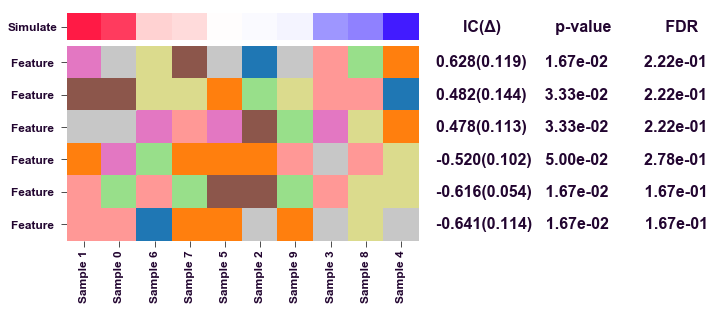

In [9]:
match_scores_for_categorical = make_match_panel(
    target,
    features_categorical,
    n_features=3,
    n_samplings=3,
    n_permutations=3,
    features_type='categorical',
    plot_sample_names=True)

In [10]:
features_binary = simulate_df(
    n * 3, n, 2, index_prefix='Feature ', column_prefix='Sample ')

features_binary

,Sample 0,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8,Sample 9
Feature 0,0,0,1,1,1,1,0,0,0,0
Feature 1,0,1,0,1,1,0,1,0,1,0
Feature 2,0,0,0,0,0,0,1,1,1,0
Feature 3,1,0,0,0,0,1,1,1,0,1
Feature 4,0,1,0,0,0,1,1,1,0,0
Feature 5,0,0,1,0,0,1,0,1,1,0
Feature 6,0,0,0,1,0,1,1,1,1,1
Feature 7,0,1,0,1,1,0,1,0,0,0
Feature 8,1,0,1,0,0,0,0,1,1,1
Feature 9,0,1,1,1,1,1,0,0,1,0


Sorting target and features.columns (based on target.index) ...
Matching ...
Matching using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	with 3 bootstrapped distributions ...
Computing p-value and FDR ...
	by scoring against 3 permuted targets ...
Sorting score ...
Making annotations ...
Plotting match panel ...


/Users/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


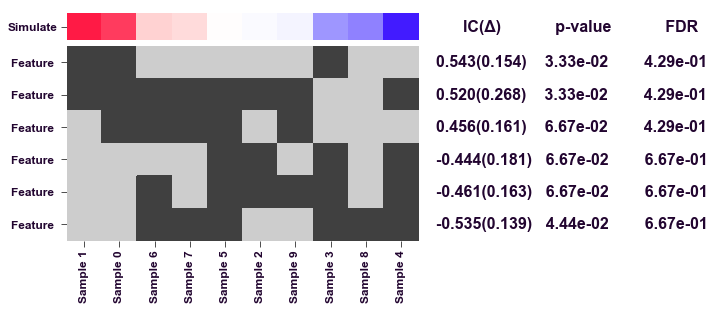

In [11]:
match_scores_for_binary = make_match_panel(
    target,
    features_binary,
    n_features=3,
    n_samplings=3,
    n_permutations=3,
    features_type='binary',
    plot_sample_names=True)

In [12]:
features = [
    [
        'Continuous features',
        features_continuous,
        ['Feature {}'.format(i) for i in range(n)],
        ['Alias {}'.format(i) for i in range(n)],
        None, #match_scores_for_continuous,
        False,
        'continuous',
    ],
    [
        'Categorical features',
        features_categorical,
        ['Feature {}'.format(i) for i in range(n)],
        ['Alias {}'.format(i) for i in range(n)],
        None, #match_scores_for_categorical,
        False,
        'categorical',
    ],
    [
        'Binary features',
        features_binary,
        ['Feature {}'.format(i) for i in range(n)],
        ['Alias {}'.format(i) for i in range(n)],
        None, #match_scores_for_binary,
        False,
        'binary',
    ],
    [
        'Cntinuous features (increasing score)',
        features_continuous.iloc[:, :-1],
        ['Feature {}'.format(i) for i in range(n)],
        ['Alias {}'.format(i) for i in range(n)],
        None, #match_scores_for_continuous,
        True,
        'continuous',
    ],
]

Sorting target and features.columns ...
Matching ...
Matching using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	with 30 bootstrapped distributions ...
Computing p-value and FDR ...
	by scoring against 30 permuted targets ...
Sorting score ...
Making annotations ...
Plotting match panel ...
Sorting target and features.columns ...
Matching ...
Matching using 1 process ...
Computing scores[i] = function(target, features[i]) ...


/Users/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Computing 0.95 CI ...
	with 30 bootstrapped distributions ...
Computing p-value and FDR ...
	by scoring against 30 permuted targets ...
Sorting score ...
Making annotations ...
Plotting match panel ...
Sorting target and features.columns ...
Matching ...
Matching using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	with 30 bootstrapped distributions ...
Computing p-value and FDR ...
	by scoring against 30 permuted targets ...
Sorting score ...
Making annotations ...
Plotting match panel ...
Sorting target and features.columns ...
Matching ...
Matching using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	with 30 bootstrapped distributions ...
Computing p-value and FDR ...
	by scoring against 30 permuted targets ...
Sorting score ...
Making annotations ...
Plotting match panel ...


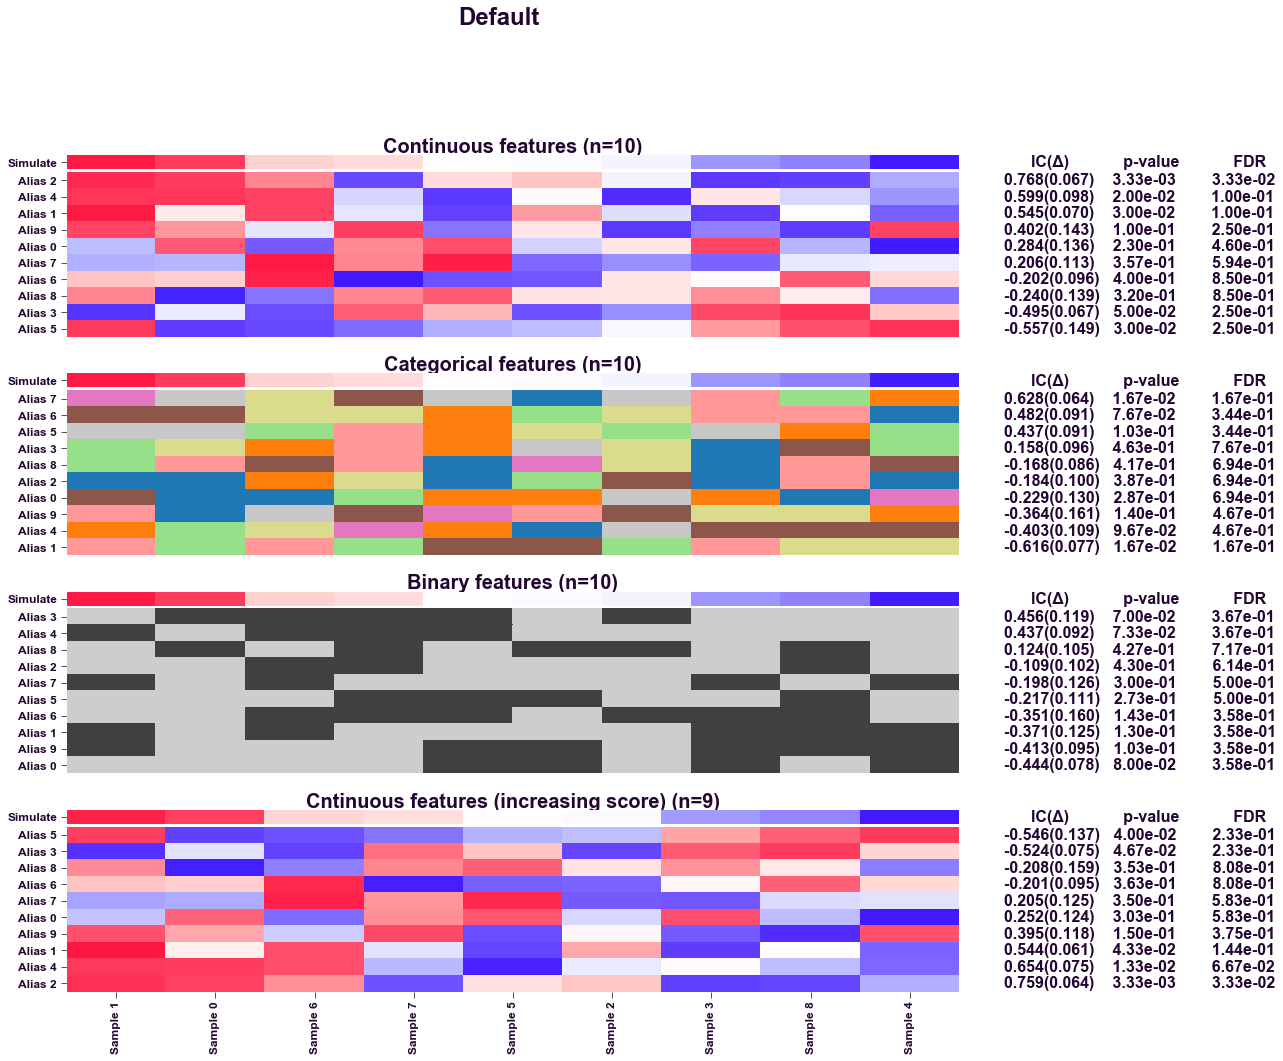

In [13]:
make_summary_match_panel(
    target, features, title='Default', plot_sample_names=True)

Sorting target and features.columns ...
Matching ...
Matching using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	with 30 bootstrapped distributions ...
Computing p-value and FDR ...
	by scoring against 30 permuted targets ...
Sorting score ...
Making annotations ...
Plotting match panel ...
Sorting target and features.columns ...
Matching ...
Matching using 1 process ...
Computing scores[i] = function(target, features[i]) ...


/Users/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Computing 0.95 CI ...
	with 30 bootstrapped distributions ...
Computing p-value and FDR ...
	by scoring against 30 permuted targets ...
Sorting score ...
Making annotations ...
Plotting match panel ...
Sorting target and features.columns ...
Matching ...
Matching using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	with 30 bootstrapped distributions ...
Computing p-value and FDR ...
	by scoring against 30 permuted targets ...
Sorting score ...
Making annotations ...
Plotting match panel ...
Sorting target and features.columns ...
Matching ...
Matching using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	with 30 bootstrapped distributions ...
Computing p-value and FDR ...
	by scoring against 30 permuted targets ...
Sorting score ...
Making annotations ...
Plotting match panel ...


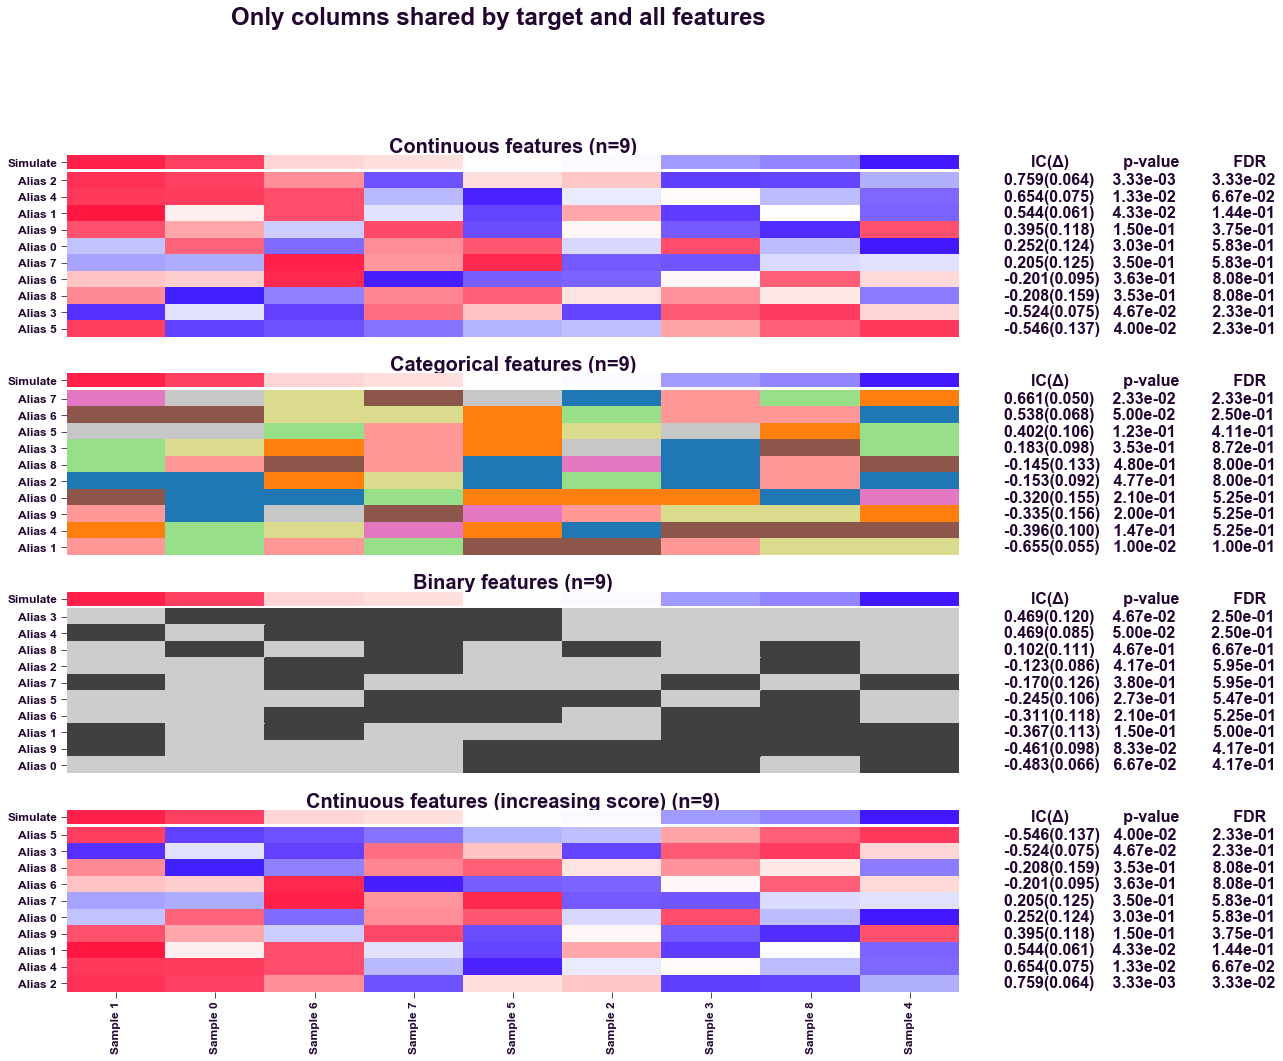

In [14]:
make_summary_match_panel(
    target,
    features,
    plot_only_columns_shared_by_target_and_all_features=True,
    title='Only columns shared by target and all features',
    plot_sample_names=True)